In [1]:
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

## Load image

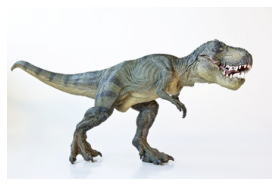

In [2]:
fname = os.path.join("..","data","img","trex.png")
image = cv2.imread(fname)
jimshow(image)

## Drawing
__Rectangle__

`cv2.rectangle(image, start_point, end_point, color, thickness)`
`color` is BGR

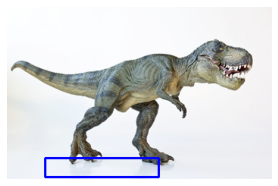

In [3]:
cv2.rectangle(image, (50,200), (200,225), (255,0,0), 2) # mutates the image

jimshow(image)

__Circle__

`cv2.rectangle(image, center_coordinates, radius, color, thickness)`

In [4]:
# shape is 0: rows, 1: cols (YX)
centerX, centerY = int(image.shape[1] * 0.83), int(image.shape[0] * 0.32) # the face

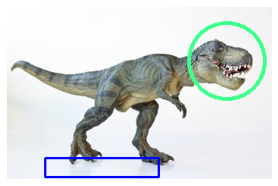

In [5]:
cv2.circle(image, (centerX, centerY), 50, (140,255,60), 3)
jimshow(image)

## Creating and using masks

In [6]:
image = cv2.imread(fname)

In [7]:
# create array of zeroes with same width as image
mask = np.zeros(image.shape[:2], dtype = 'uint8')

# we set the value inside the circle to 255 (completely white / True / 1)
cv2.circle(mask, (centerX, centerY), 50, 1, -1) # -1 is fill instead of border thickness

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

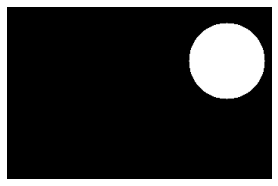

In [8]:
jimshow_channel(mask)

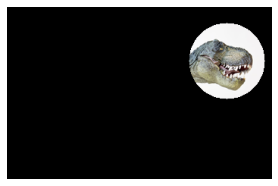

In [9]:
# perform masking on image with the result of doing a bitwise_and of image and mask
masked = cv2.bitwise_and(image, image, mask = mask)

jimshow(masked)

In [10]:
def mask_circle(image, center_coords, radius):
    mask = np.zeros(image.shape[:2], dtype = 'uint8')

    cv2.circle(mask, center_coords, radius, 1, -1) # -1 is fill instead of border thickness
    
    masked = cv2.bitwise_and(image, image, mask = mask)

    jimshow(masked)

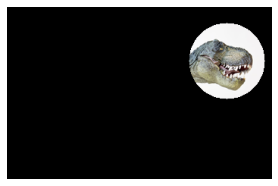

In [11]:
mask_circle(image, (centerX, centerY), 50)

## Blurring
__Average blur__

`cv2.blur(image, kernel_dimensions)`

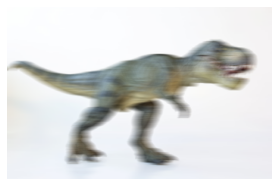

In [19]:
blurred = cv2.blur(image, (15,1)) # equal dimensions will give a non-directional blur
jimshow(blurred)

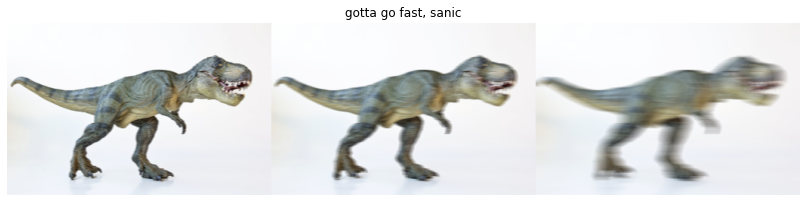

In [23]:
stacked = np.hstack([
    cv2.blur(image, (3,1)),
    cv2.blur(image, (7,1)),
    cv2.blur(image, (21,1))
])
jimshow(stacked, 'gotta go fast, sanic')

## Thresholding

In [27]:
image = cv2.imread(fname)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

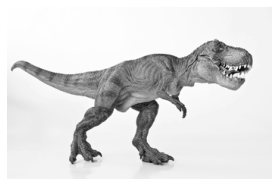

In [32]:
jimshow_channel(gray_image)

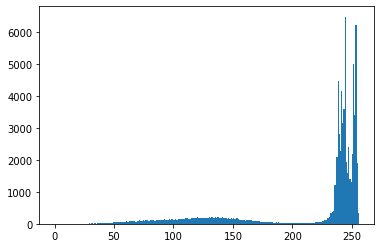

In [30]:
plt.hist(gray_image.flatten(), 256, [0,256])
plt.show()

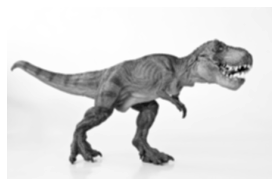

In [35]:
blurred = cv2.blur(gray_image, (3,3))
jimshow_channel(blurred)

Pick a grayscale value (the threshold), everything above and below should be 0 or 1 or completely black or white

`cv2.threshold(image, threshold_value, color, method)`

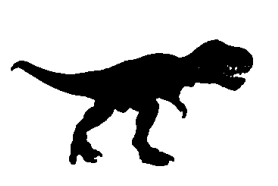

In [38]:
threshold_value, threshold_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
jimshow_channel(threshold_image)

__Inverted__

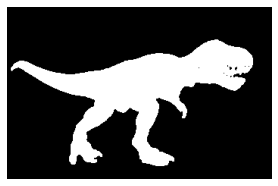

In [40]:
threshold_value, threshold_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)
jimshow_channel(threshold_image)

__Masked__

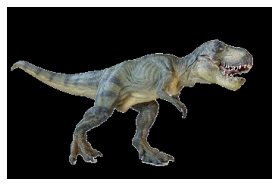

In [42]:
masked = cv2.bitwise_and(image, image, mask = threshold_image)
jimshow(masked)